librerias

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score

Carga de Dataset

In [52]:
data1 = pd.read_csv(r'C:\Users\User\OneDrive\Escritorio\UNAD\7 semestre\Analisis de datos\Tarea 4\Mall_Customers.csv')

Obtener las variables (columnas) del DataFrame

In [53]:
variables = data1.columns

Imprimir las variables

In [36]:
print("Variables en el conjunto de datos:")
for variable in variables:
    print(variable)

Variables en el conjunto de datos:
CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


Relación entre género y puntuación de gasto - Un boxplot que muestra la relación entre el género y la puntuación de gasto.

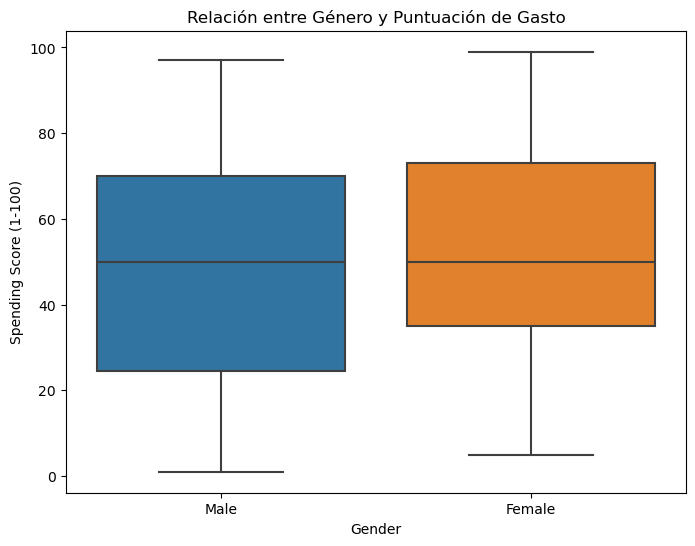

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data1)
plt.title('Relación entre Género y Puntuación de Gasto')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

Relación entre edad e ingreso anual - Un gráfico de dispersión que muestra la relación entre la edad y el ingreso anual.

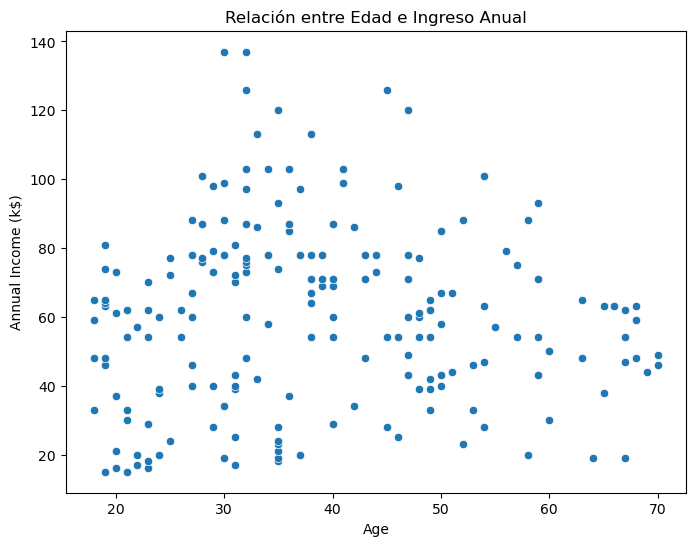

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data1)
plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

Distribución de la puntuación de gasto - Un histograma que muestra la distribución de la puntuación de gasto.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


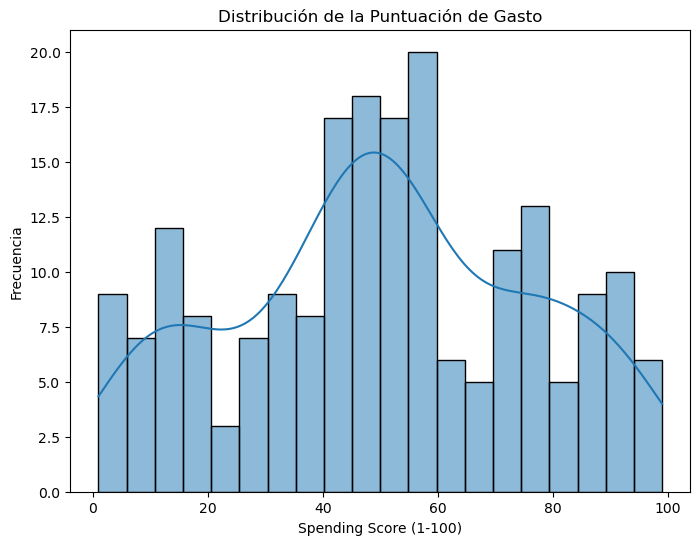

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(data1['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribución de la Puntuación de Gasto')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frecuencia')
plt.show()

Analisis de Dataset

Visualizar las primeras filas del DataFrame

In [40]:
print("Dataset 1:")
print(data1.head())

Dataset 1:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Obtener estadísticas descriptivas

In [41]:
print(data1.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Valores atipicos

Crear un boxplot

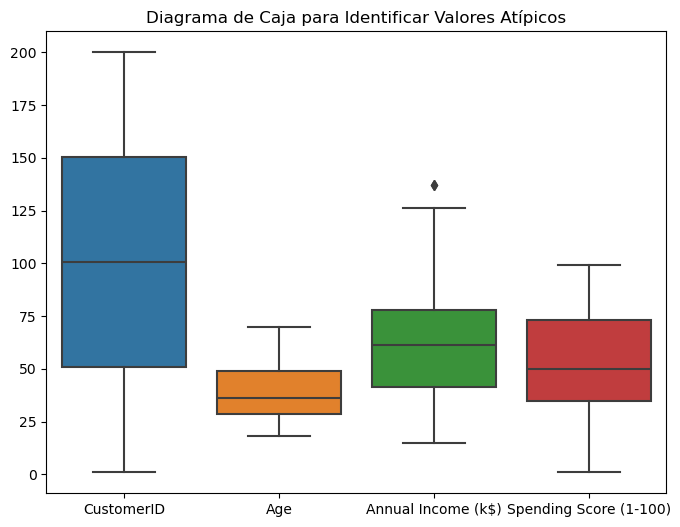

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data1)
plt.title('Diagrama de Caja para Identificar Valores Atípicos')
plt.show()

Crear un diagrama de dispersión

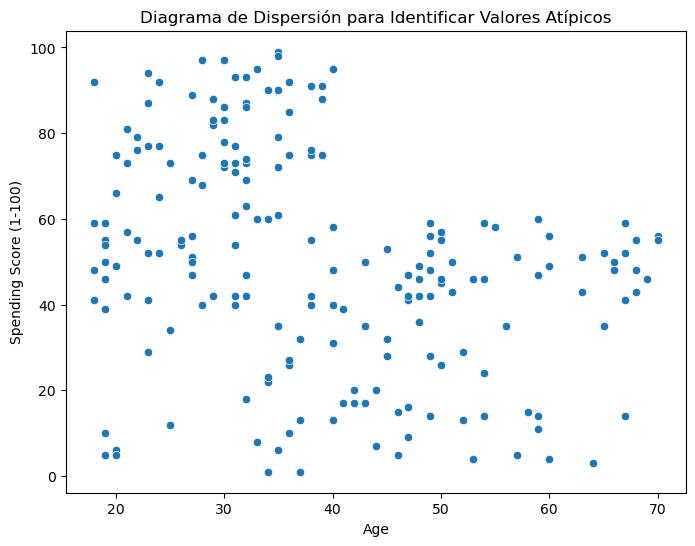

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data1)
plt.title('Diagrama de Dispersión para Identificar Valores Atípicos')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Calcular estadísticas descriptivas

In [44]:
mean_age = data1['Age'].mean()
median_age = data1['Age'].median()
std_age = data1['Age'].std()

mean_spending_score = data1['Spending Score (1-100)'].mean()
median_spending_score = data1['Spending Score (1-100)'].median()
std_spending_score = data1['Spending Score (1-100)'].std()

Imprimir estadísticas descriptivas

In [45]:
print("Estadísticas descriptivas para 'Age':")
print("Media:", mean_age)
print("Mediana:", median_age)
print("Desviación estándar:", std_age)
print()

print("Estadísticas descriptivas para 'Spending Score (1-100)':")
print("Media:", mean_spending_score)
print("Mediana:", median_spending_score)
print("Desviación estándar:", std_spending_score)

Estadísticas descriptivas para 'Age':
Media: 38.85
Mediana: 36.0
Desviación estándar: 13.969007331558883

Estadísticas descriptivas para 'Spending Score (1-100)':
Media: 50.2
Mediana: 50.0
Desviación estándar: 25.823521668370162


Tendencias

variable independiente 'X' y una variable dependiente 'y' - Ajuste del modelo de regresión lineal - coeficiente de la regresión

In [47]:
X = data1['Age'].values.reshape(-1, 1)
y = data1['Annual Income (k$)'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

Imprimir los coeficientes

In [48]:
print("Coeficiente de pendiente:", slope)
print("Término independiente:", intercept)

Coeficiente de pendiente: -0.023310971762615467
Término independiente: 61.465631252977616


Procesamiento de datos - limpieza

Eliminar filas y columnas con valores faltantes 

In [49]:
data1.dropna(axis=0, inplace=True)
data1.dropna(axis=1, inplace=True)

Transformacion

Normalizacion

In [57]:
scaler = MinMaxScaler()
data1[['Age', 'Annual Income (k$)']] = scaler.fit_transform(data1[['Age', 'Annual Income (k$)']])

Estandarizacion

In [60]:
scaler = StandardScaler()
data1[['Age', 'Annual Income (k$)']] = scaler.fit_transform(data1[['Age', 'Annual Income (k$)']])

In [62]:
data1 = pd.get_dummies(data1, columns=['Gender'])

Transformaciones logarítmicas u otras transformaciones numéricas

In [66]:
data1['Age_log'] = np.log(data1['Age'] + 1e-10)

Seleccionador

In [73]:
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

In [ ]:
Datos de entrenamiento

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [80]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.075


Reducir a 2 dimenciones

In [82]:
pca = PCA(n_components=1)  
X_pca = pca.fit_transform(X_selected)

Vizualisacion de caracteristicas reducidas en 1 dimencion

C:\Users\User\AppData\Local\Temp\ipykernel_11712\1507894049.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], y, cmap='viridis')


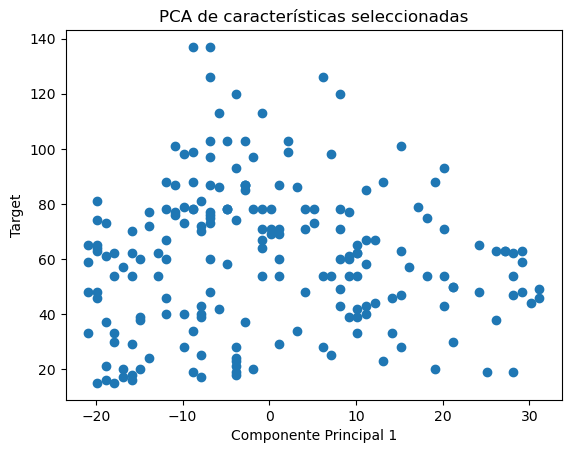

In [83]:
plt.scatter(X_pca[:, 0], y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Target')
plt.title('PCA de características seleccionadas')
plt.show()

Caracteristicas mas relevantes

In [85]:
selector = SelectKBest(score_func=f_classif, k='all')  
X_selected = selector.fit_transform(X, y)

In [ ]:
Definicion de parametros para el modelo

In [88]:
num_clusters = [2, 3, 4, 5, 6]
max_iter = [100, 200, 300]

In [89]:
best_score = -1 
best_params = {}

In [100]:
silhouette = silhouette_score(X_selected, kmeans.labels_)

In [101]:
for n_clusters in num_clusters:
    for iter_value in max_iter:
        kmeans = KMeans(n_clusters=n_clusters, max_iter=iter_value, random_state=42)
        kmeans.fit(X_selected)
        silhouette = silhouette_score(X_selected, kmeans.labels_)  # Corregir aquí
        calinski_harabasz = calinski_harabasz_score(X_selected, kmeans.labels_)  
        combined_score = silhouette + calinski_harabasz
       
        if combined_score > best_score:
            best_score = combined_score
            best_params = {'n_clusters': n_clusters, 'max_iter': iter_value}

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [105]:
best_kmeans_model = KMeans(**best_params, random_state=42)
best_kmeans_model.fit(X_selected)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=100, n_clusters=6, random_state=42)

In [104]:
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)

Silhouette Score: 0.607893903622752
Calinski-Harabasz Score: 1432.9566370175025


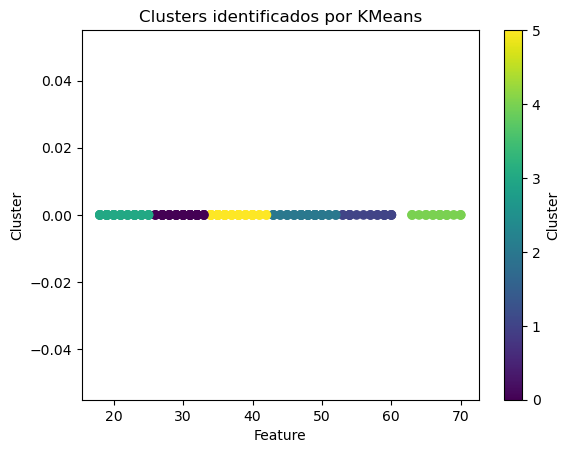

In [108]:
plt.scatter(X_selected[:, 0], [0] * len(X_selected), c=best_kmeans_model.labels_, cmap='viridis')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.title('Clusters identificados por KMeans')
plt.colorbar(label='Cluster')
plt.show()